In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset, boston housing data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

C:\Users\vvagh\AppData\Local\Temp\ipykernel_19552\3578820960.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names)


In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
# Extract features and target variable
X = df[['RM']].values  # Use the RM (average number of rooms per dwelling) feature
y = df['MEDV'].values  # The target values (house prices)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

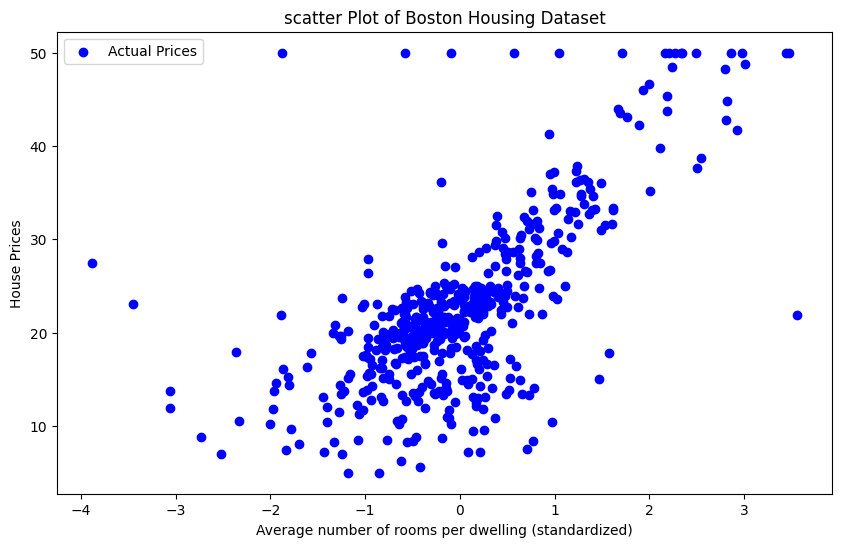

In [7]:
# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', label='Actual Prices')
plt.xlabel('Average number of rooms per dwelling (standardized)')
plt.ylabel('House Prices')
plt.title('scatter Plot of Boston Housing Dataset')
plt.legend()
plt.show()

In [ ]:
y.shape, X_scaled.shape

In [ ]:
X_flattened = X_scaled.flatten()
X_flattened.shape

In [ ]:
# Initial guess
m = np.random.randn()
c = np.random.randn()
learning_rate = 0.1
n_iterations = 1000
m1 = len(X_flattened)
loss_history = []
theta_history = []

In [ ]:
# Gradient descent algorithm
for interation in range(n_iterations):
    # Prediction
    y_pred = m*X_flattened + c

    # Gradients
    gradient_m = (1/m1)*np.sum(y_pred - y)*X_flattened
    gradient_c = (1/m1)*np.sum(y_pred - y)

    # Update rule
    m = m - learning_rate*gradient_m
    c = c - learning_rate*gradient_c

    # Record loss and history
    loss = (1/m1)*np.sum((y_pred - y)**2)
    loss_history.append(loss)

    theta_history.append((c, m))


In [ ]:
y_pred = m*X_flattened + c

# Same thing (fitting a line) in a moregeneralized form here and plotted the visualization

In [ ]:
# Extract features and target variable
X = df[['RM']].values  # Use the RM (average number of rooms per dwelling) feature
y = df['MEDV'].values  # The target values (house prices)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Initialize parameters
theta = np.random.randn(X_b.shape[1])  # Random initialization
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
loss_history = [] 
theta_history = []

# Gradient descent
for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    loss = (1/m) * np.sum((X_b.dot(theta) - y)**2)
    loss_history.append(loss)
    theta_history.append(theta.copy())

# Make predictions
y_pred = X_b.dot(theta)

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', label='Actual Prices')
plt.plot(X_scaled, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Average number of rooms per dwelling (standardized)')
plt.ylabel('House Prices')
plt.title('Linear Regression on Boston Housing Dataset')
plt.legend()
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), loss_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Compute the loss surface
theta0_vals = np.linspace(theta[0] - 10, theta[0] + 10, 100)
theta1_vals = np.linspace(theta[1] - 10, theta[1] + 10, 100)
loss_surface = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        t = np.array([theta0, theta1])
        loss_surface[i, j] = (1/m) * np.sum((X_b.dot(t) - y)**2)

theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

# Plot the loss surface and optimization path
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_grid, theta1_grid, loss_surface, cmap='viridis', alpha=0.8)
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Loss')
ax.set_title('Loss Surface with Optimization Path')

# Convert theta_history to numpy array for easier slicing
theta_history = np.array(theta_history)

# Plot the optimization path
ax.plot(theta_history[:, 0], theta_history[:, 1], loss_history, 'r-', marker='o', label='Optimization Path')
ax.legend()
plt.show()

In [ ]:
# Extract features and target variable
features = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE']  # Use multiple features
X = df[features].values
y = df['MEDV'].values  # The target values (house prices)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Initialize parameters
theta = np.random.randn(X_b.shape[1])  # Random initialization
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
loss_history = []
theta_history = []

# Gradient descent
for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    loss = (1/m) * np.sum((X_b.dot(theta) - y)**2)
    loss_history.append(loss)
    theta_history.append(theta.copy())

# Make predictions
y_pred = X_b.dot(theta)

In [ ]:
X_b.shape

In [ ]:
# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Regression Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multiple Linear Regression on Boston Housing Dataset')
plt.legend()
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), loss_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [ ]:
# Extract features and target variable
X = df[['RM', 'AGE']].values  # Use the RM and LSTAT features
y = df['MEDV'].values  # The target values (house prices)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Initialize parameters
theta = np.random.randn(X_b.shape[1])  # Random initialization
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
loss_history = []

# Gradient descent
for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    loss = (1/m) * np.sum((X_b.dot(theta) - y)**2)
    loss_history.append(loss)

# Make predictions
y_pred = X_b.dot(theta)

# Plot the data and regression plane
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y, color='blue', label='Actual Prices')

# Create a grid for plotting the plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100),
                               np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100))
y_surf = theta[0] + theta[1] * x1_surf + theta[2] * x2_surf

ax.plot_surface(x1_surf, x2_surf, y_surf, color='red', alpha=0.5)

ax.set_xlabel('Average number of rooms per dwelling (standardized)')
ax.set_ylabel('% lower status of the population (standardized)')
ax.set_zlabel('House Prices')
ax.set_title('Linear Regression Plane on Boston Housing Dataset')
plt.legend()
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), loss_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/vega/vega-datasets/next/data/seattle-weather.csv'
df1 = pd.read_csv(url)

In [ ]:
df1

In [ ]:
# Extract features and target variable
df1['DATE'] = pd.to_datetime(df1['date'])
df1['DAY_OF_YEAR'] = df1['DATE'].dt.dayofyear
df1

In [ ]:
# Use 'DAY_OF_YEAR' as the feature and 'TMAX' (maximum temperature) as the target variable
X = df1[['DAY_OF_YEAR']].values  # Feature: day of the year
y = df1['temp_max'].values  # Target: maximum temperature
df1 = df1.sort_values('DATE').reset_index(drop=True)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', label='Actual Temperatures')
plt.xlabel('Day of the Year (standardized)')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Linear Regression on Seattle Daily Maximum Temperature')
plt.legend()
plt.show()

In [ ]:
# Add a column of ones to X to account for the bias term (intercept)
X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Initialize parameters
theta = np.random.randn(X_b.shape[1])  # Random initialization
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)
loss_history = []
theta_history = []

# Gradient descent
for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    loss = (1/m) * np.sum((X_b.dot(theta) - y)**2)
    loss_history.append(loss)
    theta_history.append(theta.copy())

# Make predictions
y_pred = X_b.dot(theta)

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, color='blue', label='Actual Temperatures')
plt.plot(X_scaled, y_pred, color='red', linewidth=2, label='Predicted Temperatures')
plt.xlabel('Day of the Year (standardized)')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Linear Regression on Seattle Daily Maximum Temperature')
plt.legend()
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), loss_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

# Calculate and print performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

In [ ]:
# Function to create polynomial features manually
def create_polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))  # Start with a column of ones for the intercept term
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    return X_poly

In [ ]:
# Try to learn about np.hstack if you want to use custom function to create polynomials
array1 = np.array([[1, 2, 3],
                   [4, 5, 6]])

array2 = np.array([[7, 8, 9],
                   [10, 11, 12]])

result = np.hstack((array1, array2))
print(result)

In [ ]:
# using scikit learn to generate polynomial instead of our customized function
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features for degree 3
degree = 3
poly = PolynomialFeatures(degree)
X_polysklearn = poly.fit_transform(X)

In [ ]:
# Experiment with different polynomial degrees
degrees = [2, 3, 4, 5]

for degree in degrees:
    print(f"\nPolynomial Degree: {degree}")
    
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)

    # Add a column of ones to X to account for the bias term (intercept)
    X_b = np.column_stack([np.ones((X_scaled.shape[0], 1)), X_scaled])

    # Initialize parameters
    theta = np.random.randn(X_b.shape[1])  # Random initialization
    learning_rate = 0.1
    n_iterations = 1000
    m = len(X_b)
    loss_history = []
    theta_history = []

    # Gradient descent
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients
        loss = (1/m) * np.sum((X_b.dot(theta) - y)**2)
        loss_history.append(loss)
        theta_history.append(theta.copy())

    # Make predictions
    y_pred = X_b.dot(theta)
    
    # Sort the values by the feature before plotting
    sorted_indices = np.argsort(X[:, 0])
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    # Plot the data and regression curve
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Temperatures')
    plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted Temperatures')
    plt.xlabel('Day of the Year')
    plt.ylabel('Maximum Temperature (°C)')
    plt.title(f'Polynomial Regression (Degree {degree}) on Seattle Daily Maximum Temperature')
    plt.legend()
    plt.show()

    # Plot the loss over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(n_iterations), loss_history, color='blue')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(f'Loss over Iterations (Degree {degree})')
    plt.show()

    # Scatter plot of predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, color='blue', alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Temperatures')
    plt.ylabel('Predicted Temperatures')
    plt.title(f'Predicted vs Actual Temperatures (Degree {degree})')
    plt.show()

    # Calculate and print performance metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")